# MSA 2023 Phase 2 - Part 1

In [46]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\JackM\anaconda3\envs\datascienv\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [47]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [48]:
#Reading in CSV file
MarketData = pd.read_csv('market_segmentation.csv')

#printing first 10 records
MarketData.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [49]:
#Finding number of records in file
MarketData.shape

(8068, 11)

In [50]:
#Finding number of null values
MarketData.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [51]:
#finding gender split
NumMale = MarketData.Gender.value_counts().Male
ProportionMale = NumMale/MarketData.shape[0]

print("The proportion of males in the dataset is " + str(ProportionMale))


The proportion of males in the dataset is 0.5474714923153198


In [52]:
#Finding Mean and standard deviation of age
MeanAge = MarketData.Age.mean()
AgeStd = MarketData.Age.std()


print("Mean age is " + str(MeanAge) + "\nStandard deviation of age is " + str(AgeStd))

Mean age is 43.46690629647992
Standard deviation of age is 16.71169631872121


In [53]:
#finding proportion graduated
NumGrad = MarketData.Graduated.value_counts().Yes
ProportionGrad = NumGrad/MarketData.shape[0]

print("The proportion of graduates in the dataset is " + str(ProportionGrad))

The proportion of graduates in the dataset is 0.615765989092712


In [54]:
#finding professions
ProfCounts = MarketData.Profession.value_counts()
nullWorkers = MarketData.Profession.isnull().sum()


print(ProfCounts)
print("There are "+ str(nullWorkers) + " people where profession is null")


Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64
There are 124 people where profession is null


In [55]:
#Finding Mean and standard deviation of age
MeanExperience = MarketData.Work_Experience.mean()
ExperienceStd = MarketData.Work_Experience.std()
nullExperience = MarketData.Work_Experience.isnull().sum()

print("Mean work experince is " + str(MeanExperience) + "\nStandard deviation of work experience is " + str(ExperienceStd))
print("There are "+ str(nullExperience) + " people where profession is null")

Mean work experince is 2.641663213150988
Standard deviation of work experience is 3.4067629854579518
There are 829 people where profession is null


In [56]:
SpendingCounts = MarketData.Spending_Score.value_counts()

print(SpendingCounts)

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64


In [57]:
MeanSize = MarketData.Family_Size.mean()
SizeStd = MarketData.Family_Size.std()
nullSize = MarketData.Family_Size.isnull().sum()

print("Mean family size is " + str(MeanSize) + "\nStandard deviation of family size is " + str(SizeStd))
print("There are "+ str(nullSize) + " people where family size is null")

Mean family size is 2.85012285012285
Standard deviation of family size is 1.5314132820253783
There are 335 people where family size is null


In [58]:
Var_1s = MarketData.Var_1.value_counts()

print(Var_1s)

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64


In [59]:
Segments =  MarketData.Segmentation.value_counts()

print(Segments)

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64


AttributeError: 'dict' object has no attribute 'boxplot'

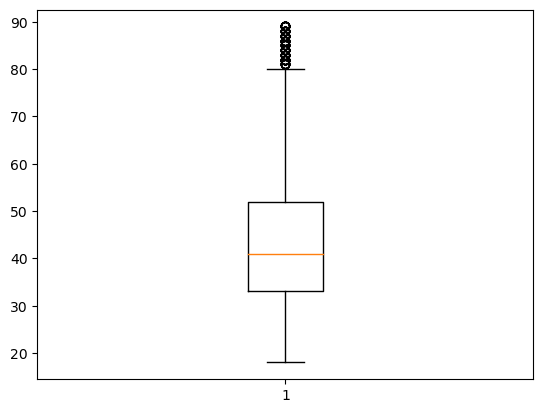

In [119]:


tempA = MarketData.query("Segmentation == 'A'")
tempB = MarketData.query("Segmentation == 'B'")
tempC = MarketData.query("Segmentation == 'C'")
tempD = MarketData.query("Segmentation == 'D'")

#print(tempA["Age"])


plot1 = plt.boxplot(tempA["Age"])
plot2 = plt.boxplot(tempB["Age"])
plot3 = plt.boxplot(tempC["Age"])
plot4 = plt.boxplot(tempD["Age"])



plt.show()

## 2. Clean data

In [60]:
#the datapoints with the most null values are work experience and family size
#these may be possible to replace with average, but that 
MarketData["Family_Size"] = MarketData["Family_Size"].fillna(MeanSize)
MarketData["Work_Experience"] = MarketData["Work_Experience"].fillna(MeanExperience)
MarketData.isnull().sum()



ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1               76
Segmentation         0
dtype: int64

In [61]:
#Removing null values 
MarketData = MarketData.dropna()
MarketData.shape

(7669, 11)

## 3. Visualise data

In [66]:
# Create a bar plot of name vs grade
plt.bar(x=MarketData.Name, height=MarketData.Grade, color='red')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()



## 4. Identify correlated variables

In [63]:
#

## 5. Summary